# datetime数据类型

In [1]:
import pandas as pd

- 学习目标
- 能够使用 pandas 来处理日期时间类型数据

## Python 的 datetime 对象
- Python 内置了datetime 对象，可以在 datetime 库中找到

In [2]:
from datetime import datetime
# 获取当前时间
t1 = datetime.now()
t1

datetime.datetime(2022, 12, 28, 19, 30, 43, 432613)

In [3]:
# 手动创建datetime
t2 = datetime(2022,11,11)
t2

datetime.datetime(2022, 11, 11, 0, 0)

In [4]:
t3 = datetime(2022,11,11,11,11,11)
t3

datetime.datetime(2022, 11, 11, 11, 11, 11)

In [5]:
# 两个datetime相减
diff = t1 -t2
print(diff)

47 days, 19:30:43.432613


In [6]:
# 查看两个日期相减的结果类型
print(type(diff))

<class 'datetime.timedelta'>


# pandas 中的数据转换成 datetime

- pandas 可以使用 to_datetime 函数把数据转换成 datetime 类型

## 加载 country_timeseries.csv 数据，并查看前5行的前5列数据

In [7]:
ebola = pd.read_csv('./data/country_timeseries.csv')
ebola.head(5)

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [8]:
ebola.iloc[:5,:5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,1/5/2015,289,2776.0,NaN,10030.0
1,1/4/2015,288,2775.0,NaN,9780.0
2,1/3/2015,287,2769.0,8166.0,9722.0
3,1/2/2015,286,NaN,8157.0,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0


In [9]:
# 注：从数据中看出 Date 列是日期，但通过info查看加载后数据为object类型
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

## 可以通过 pandas 的 to_datetime方法把 Date 列转换为datetime，然后创建新列

In [10]:
ebola['Date_Dt'] = pd.to_datetime(ebola['Date'])
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

## 如果数据中包含日期时间数据，可以在加载的时候，通过parse_dates参数指定自动转换为 datetime`

In [11]:
ebola = pd.read_csv('./data/country_timeseries.csv',parse_dates=['Date'])
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

# 提取 datetime 的各个部分

## 获取了一个 datetime 对象，就可以提取日期的各个部分了

In [12]:
dt = pd.to_datetime('2022-10-20')
dt

Timestamp('2022-10-20 00:00:00')

- 可以看到得到的数据是Timestamp类型，通过Timestamp可以获取年、月、日等部分

In [13]:
dt.year

2022

In [14]:
dt.month

10

In [15]:
dt.day

20

## 通过 ebola 数据集的 Date 列，创建新列 year、month、day

In [16]:
ebola['year'] = ebola['Date'].dt.year
ebola['year']

0      2015
1      2015
2      2015
3      2015
4      2014
       ... 
117    2014
118    2014
119    2014
120    2014
121    2014
Name: year, Length: 122, dtype: int64

In [17]:
ebola['month'] = ebola['Date'].dt.month
ebola['month']

0       1
1       1
2       1
3       1
4      12
       ..
117     3
118     3
119     3
120     3
121     3
Name: month, Length: 122, dtype: int64

In [18]:
ebola['day'] = ebola['Date'].dt.day
ebola['day']

0       5
1       4
2       3
3       2
4      31
       ..
117    27
118    26
119    25
120    24
121    22
Name: day, Length: 122, dtype: int64

In [19]:
ebola[['Date','year','month','day']].head()

,Date,year,month,day
0,2015-01-05,2015,1,5
1,2015-01-04,2015,1,4
2,2015-01-03,2015,1,3
3,2015-01-02,2015,1,2
4,2014-12-31,2014,12,31


In [20]:
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

# 日期运算和Timedelta

- Ebola 数据集中的 Day 列表示一个国家爆发 Ebola 疫情的天数。这一列数据可以通过日期运算重建该列俊辉

## 获取疫情爆发的第一天

In [21]:
ebola['Date'].min()

Timestamp('2014-03-22 00:00:00')

- 结果说明：疫情爆发的第一天（数据集中最早的一天）是2014-03-22

## 计算疫情爆发的天数时，只需要用每个日期减去这个日期即可

In [22]:
ebola['outbreak_day'] = ebola['Date'] - ebola['Date'].min()
ebola[['Date','Day','outbreak_day']]

,Date,Day,outbreak_day
0,2015-01-05,289,289 days
1,2015-01-04,288,288 days
2,2015-01-03,287,287 days
3,2015-01-02,286,286 days
4,2014-12-31,284,284 days
...,...,...,...
117,2014-03-27,5,5 days
118,2014-03-26,4,4 days
119,2014-03-25,3,3 days
120,2014-03-24,2,2 days


In [23]:
ebola[['Date','Day','outbreak_day']].tail()

,Date,Day,outbreak_day
117,2014-03-27,5,5 days
118,2014-03-26,4,4 days
119,2014-03-25,3,3 days
120,2014-03-24,2,2 days
121,2014-03-22,0,0 days


## 执行这种日期运算，会得到一个timedelta对象

In [24]:
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   Date                 122 non-null    datetime64[ns] 
 1   Day                  122 non-null    int64          
 2   Cases_Guinea         93 non-null     float64        
 3   Cases_Liberia        83 non-null     float64        
 4   Cases_SierraLeone    87 non-null     float64        
 5   Cases_Nigeria        38 non-null     float64        
 6   Cases_Senegal        25 non-null     float64        
 7   Cases_UnitedStates   18 non-null     float64        
 8   Cases_Spain          16 non-null     float64        
 9   Cases_Mali           12 non-null     float64        
 10  Deaths_Guinea        92 non-null     float64        
 11  Deaths_Liberia       81 non-null     float64        
 12  Deaths_SierraLeone   87 non-null     float64        
 13  Deaths_Nigeria      

# 案例：银行数据分析

## 加载 banklist.csv 数据，并查看数据信息

In [25]:
bank = pd.read_csv('./data/banklist.csv')
bank.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17
1,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,26-Jul-17
2,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,26-Jul-17
3,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,3-Mar-17,18-May-17
4,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,27-Jan-17,18-May-17


In [26]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Bank Name              553 non-null    object
 1   City                   553 non-null    object
 2   ST                     553 non-null    object
 3   CERT                   553 non-null    int64 
 4   Acquiring Institution  553 non-null    object
 5   Closing Date           553 non-null    object
 6   Updated Date           553 non-null    object
dtypes: int64(1), object(6)
memory usage: 30.4+ KB


## 重新加载 banklist.csv 数据，并指定把 Closing Date 和 Updated Date 转换为datetime类型

In [27]:
banks = pd.read_csv('./data/banklist.csv',parse_dates=['Closing Date','Updated Date'])
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              553 non-null    object        
 1   City                   553 non-null    object        
 2   ST                     553 non-null    object        
 3   CERT                   553 non-null    int64         
 4   Acquiring Institution  553 non-null    object        
 5   Closing Date           553 non-null    datetime64[ns]
 6   Updated Date           553 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.4+ KB


## 添加两列，分别表示银行破产的季度和年份

In [28]:
banks['Closing Quarter'],banks['Closing Year'] = banks['Closing Date'].dt.quarter,banks['Closing Date'].dt.year
banks.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date,Closing Quarter,Closing Year
0,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-05-26,2017-07-26,2,2017
1,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-05-05,2017-07-26,2,2017
2,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-04-28,2017-07-26,2,2017
3,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,2017-03-03,2017-05-18,1,2017
4,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,2017-01-27,2017-05-18,1,2017


## 可以根据新添加的两列，计算每年破产银行数量以及计算每年每季度破产银行数量

In [29]:
closing_year = banks.groupby('Closing Year').size()
closing_year

Closing Year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      6
dtype: int64

<AxesSubplot: xlabel='Closing Year'>

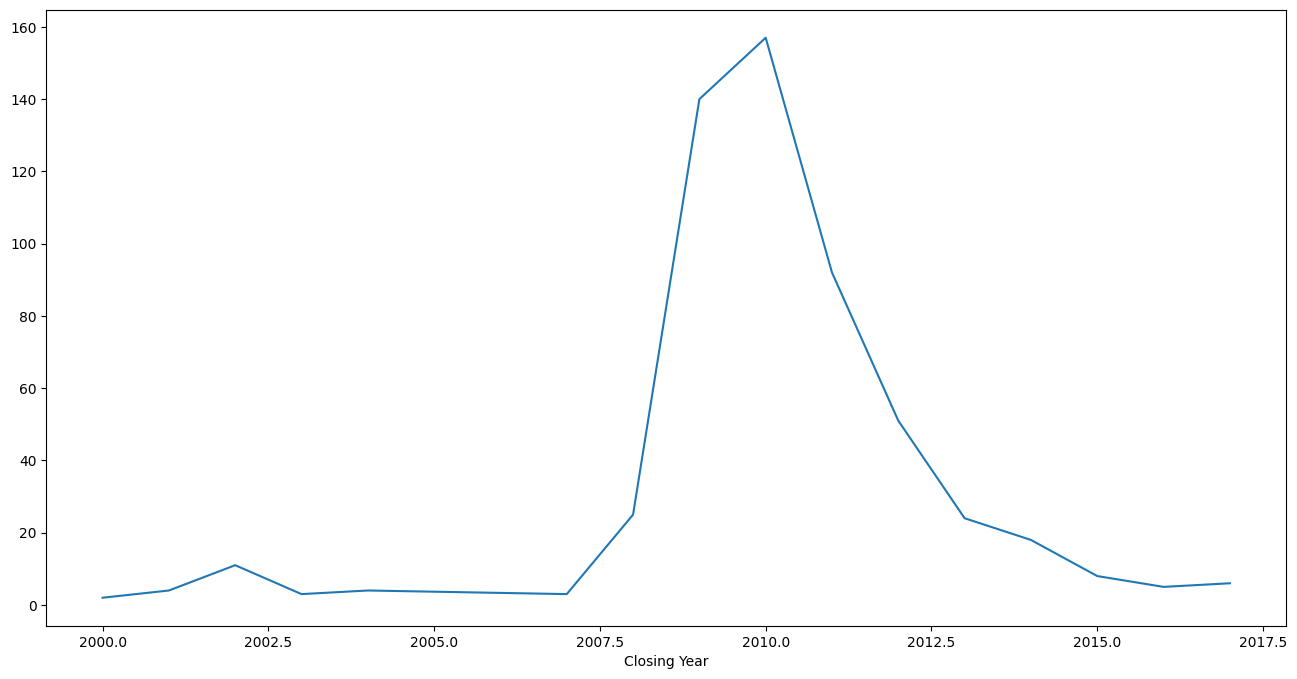

In [30]:
# pandas绘图
closing_year.plot(figsize=(16,8))

In [31]:
closing_year_quater = banks.groupby(['Closing Year','Closing Quarter']).size()
closing_year_quater

Closing Year  Closing Quarter
2000          4                   2
2001          1                   1
              2                   1
              3                   2
2002          1                   6
              2                   2
              3                   1
              4                   2
2003          1                   1
              2                   1
              4                   1
2004          1                   3
              2                   1
2007          1                   1
              3                   1
              4                   1
2008          1                   2
              2                   2
              3                   9
              4                  12
2009          1                  21
              2                  24
              3                  50
              4                  45
2010          1                  41
              2                  45
              3                  4

<AxesSubplot: xlabel='Closing Year,Closing Quarter'>

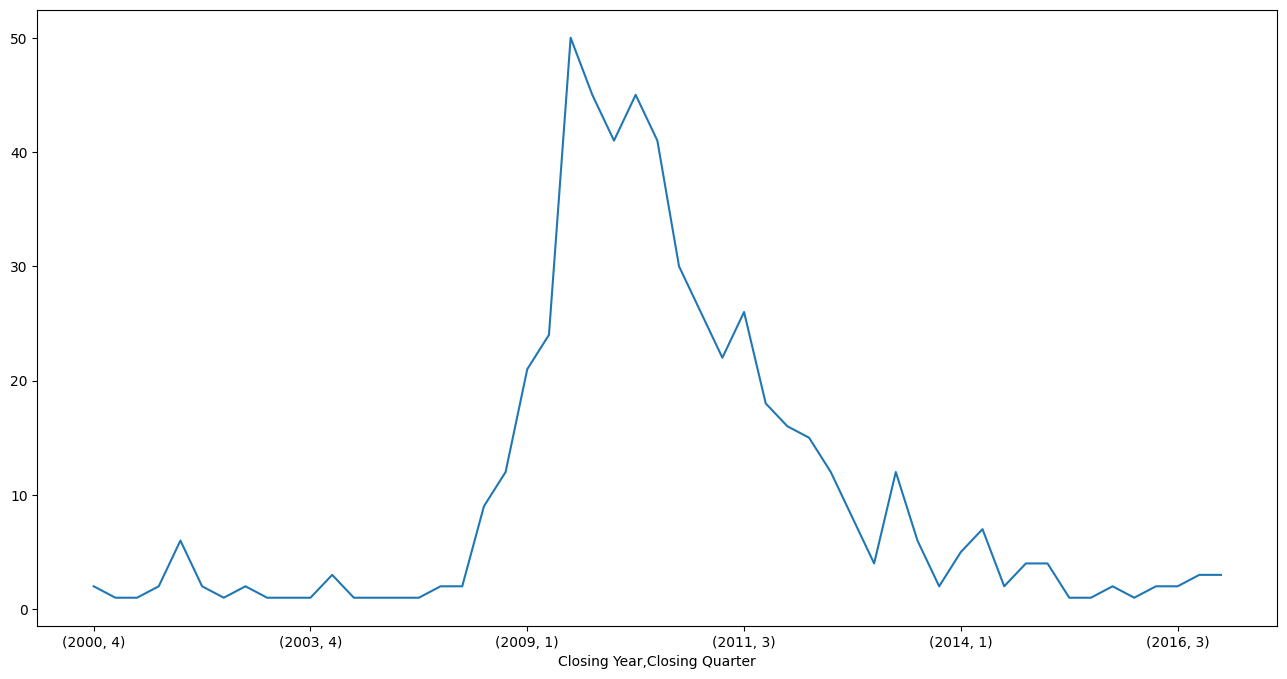

In [32]:
closing_year_quater.plot(figsize=(16,8))

# 案例：处理股票数据

- 股票价格是包含日期的典型数据俊辉

## 加载股票数据集

### 加载 TSLA.csv 股票数据

In [33]:
tesla = pd.read_csv('./data/TSLA.csv')
tesla.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-08-19,260.649994,255.020004,260.329987,255.250000,3604300,255.250000
1,2015-08-20,254.559998,241.899994,252.059998,242.179993,4905800,242.179993
2,2015-08-21,243.800003,230.509995,236.000000,230.770004,6590200,230.770004
3,2015-08-24,231.399994,195.000000,202.789993,218.869995,9581600,218.869995
4,2015-08-25,230.899994,219.119995,230.520004,220.029999,4327300,220.029999


In [34]:
# 可以看出，tesla股票数据中第一列为日期，在加载数据的时候，可以直接解析日期数据
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1215 non-null   object 
 1   High       1215 non-null   float64
 2   Low        1215 non-null   float64
 3   Open       1215 non-null   float64
 4   Close      1215 non-null   float64
 5   Volume     1215 non-null   int64  
 6   Adj Close  1215 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 66.6+ KB


In [35]:
tesla = pd.read_csv('./data/TSLA.csv',parse_dates=[0])
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1215 non-null   datetime64[ns]
 1   High       1215 non-null   float64       
 2   Low        1215 non-null   float64       
 3   Open       1215 non-null   float64       
 4   Close      1215 non-null   float64       
 5   Volume     1215 non-null   int64         
 6   Adj Close  1215 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 66.6 KB


## 基于日期数据获取数据子集

### 获取2015年8月的股票数据

In [36]:
tesla.loc[(tesla['Date'].dt.year==2018)&(tesla['Date'].dt.month==8)]

,Date,High,Low,Open,Close,Volume,Adj Close
743,2018-08-01,303.000000,293.000000,297.989990,300.839996,10129400,300.839996
744,2018-08-02,349.989990,323.160004,328.440002,349.540009,23215000,349.540009
745,2018-08-03,355.000000,342.529999,347.809998,348.170013,13656500,348.170013
746,2018-08-06,354.980011,341.820007,345.459991,341.989990,8564300,341.989990
747,2018-08-07,387.459991,339.149994,343.839996,379.570007,30875800,379.570007
748,2018-08-08,382.640015,367.119995,369.089996,370.339996,24571200,370.339996
749,2018-08-09,367.010010,345.730011,365.549988,352.450012,17183800,352.450012
750,2018-08-10,360.000000,346.000000,354.000000,355.489990,11552000,355.489990
751,2018-08-13,363.190002,349.019989,361.130005,356.410004,10463900,356.410004
752,2018-08-14,359.200012,347.100006,358.450012,347.640015,6986400,347.640015


- DatetimeIndex 对象
- 在处理包含datetime的数据时，经常需要把datetime对象设置成DateFrame的行标签索引

#### 首先把 tesla 数据集的 Date 列指定为行标签索引

In [37]:
tesla.set_index('Date',inplace=True)
tesla.index

DatetimeIndex(['2015-08-19', '2015-08-20', '2015-08-21', '2015-08-24',
               '2015-08-25', '2015-08-26', '2015-08-27', '2015-08-28',
               '2015-08-31', '2015-09-01',
               ...
               '2020-06-03', '2020-06-04', '2020-06-05', '2020-06-08',
               '2020-06-09', '2020-06-10', '2020-06-11', '2020-06-12',
               '2020-06-15', '2020-06-16'],
              dtype='datetime64[ns]', name='Date', length=1215, freq=None)

- 把索引设置为日期对象后，可以直接使用日期来获取某些数据

#### 示例：获取 2016 年的股票数据

In [38]:
tesla['2016']

C:\Users\hp\AppData\Local\Temp\ipykernel_17044\29760123.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  tesla['2016']


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,231.380005,219.000000,230.720001,223.410004,6827100,223.410004
2016-01-05,226.889999,220.000000,226.360001,223.429993,3186800,223.429993
2016-01-06,220.050003,215.979996,220.000000,219.039993,3779100,219.039993
2016-01-07,218.440002,213.669998,214.190002,215.649994,3554300,215.649994
2016-01-08,220.440002,210.770004,217.860001,211.000000,3628100,211.000000
...,...,...,...,...,...,...
2016-12-23,213.449997,207.710007,208.000000,213.339996,4670500,213.339996
2016-12-27,222.250000,214.419998,214.880005,219.529999,5915700,219.529999
2016-12-28,223.800003,217.199997,221.529999,219.740005,3782500,219.740005


#### 示例：获取 2018-08 的股票数据

In [39]:
tesla['2018-08']

C:\Users\hp\AppData\Local\Temp\ipykernel_17044\1846028480.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  tesla['2018-08']


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-08-01,303.000000,293.000000,297.989990,300.839996,10129400,300.839996
2018-08-02,349.989990,323.160004,328.440002,349.540009,23215000,349.540009
2018-08-03,355.000000,342.529999,347.809998,348.170013,13656500,348.170013
2018-08-06,354.980011,341.820007,345.459991,341.989990,8564300,341.989990
2018-08-07,387.459991,339.149994,343.839996,379.570007,30875800,379.570007
2018-08-08,382.640015,367.119995,369.089996,370.339996,24571200,370.339996
2018-08-09,367.010010,345.730011,365.549988,352.450012,17183800,352.450012
2018-08-10,360.000000,346.000000,354.000000,355.489990,11552000,355.489990
2018-08-13,363.190002,349.019989,361.130005,356.410004,10463900,356.410004


In [40]:
# TimedeltaIndex 对象

In [41]:
tesla = tesla.reset_index()

#### 创建一个timedelta列和RefDate列

In [42]:
tesla['Ref Date'] = tesla['Date'] - tesla['Date'].min()
tesla['Ref Date']

0         0 days
1         1 days
2         2 days
3         5 days
4         6 days
          ...   
1210   1757 days
1211   1758 days
1212   1759 days
1213   1762 days
1214   1763 days
Name: Ref Date, Length: 1215, dtype: timedelta64[ns]

#### 把 Ref Date 列设置为行标签索引

In [43]:
tesla.index = tesla['Ref Date']
tesla

,Date,High,Low,Open,Close,Volume,Adj Close,Ref Date
Ref Date,,,,,,,,
0 days,2015-08-19,260.649994,255.020004,260.329987,255.250000,3604300,255.250000,0 days
1 days,2015-08-20,254.559998,241.899994,252.059998,242.179993,4905800,242.179993,1 days
2 days,2015-08-21,243.800003,230.509995,236.000000,230.770004,6590200,230.770004,2 days
5 days,2015-08-24,231.399994,195.000000,202.789993,218.869995,9581600,218.869995,5 days
6 days,2015-08-25,230.899994,219.119995,230.520004,220.029999,4327300,220.029999,6 days
...,...,...,...,...,...,...,...,...
1757 days,2020-06-10,1027.479980,982.500000,991.880005,1025.050049,18563400,1025.050049,1757 days
1758 days,2020-06-11,1018.960022,972.000000,990.200012,972.840027,15916500,972.840027,1758 days
1759 days,2020-06-12,987.979980,912.599976,980.000000,935.280029,16730200,935.280029,1759 days


In [44]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
TimedeltaIndex: 1215 entries, 0 days to 1763 days
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype          
---  ------     --------------  -----          
 0   Date       1215 non-null   datetime64[ns] 
 1   High       1215 non-null   float64        
 2   Low        1215 non-null   float64        
 3   Open       1215 non-null   float64        
 4   Close      1215 non-null   float64        
 5   Volume     1215 non-null   int64          
 6   Adj Close  1215 non-null   float64        
 7   Ref Date   1215 non-null   timedelta64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1), timedelta64[ns](1)
memory usage: 85.4 KB


#### 可以基于 Ref_Date 来选择数据

In [45]:
tesla['0 days':'5 days']

,Date,High,Low,Open,Close,Volume,Adj Close,Ref Date
Ref Date,,,,,,,,
0 days,2015-08-19,260.649994,255.020004,260.329987,255.250000,3604300,255.250000,0 days
1 days,2015-08-20,254.559998,241.899994,252.059998,242.179993,4905800,242.179993,1 days
2 days,2015-08-21,243.800003,230.509995,236.000000,230.770004,6590200,230.770004,2 days
5 days,2015-08-24,231.399994,195.000000,202.789993,218.869995,9581600,218.869995,5 days


# 日期范围

- 包含日期的数据集中，并非每一个都包含固定频率。比如在ebola数据集中，日期并没有规律

In [46]:
ebola_head = ebola.iloc[:5,:5]
ebola_head

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,2015-01-05,289,2776.0,NaN,10030.0
1,2015-01-04,288,2775.0,NaN,9780.0
2,2015-01-03,287,2769.0,8166.0,9722.0
3,2015-01-02,286,NaN,8157.0,NaN
4,2014-12-31,284,2730.0,8115.0,9633.0


- 从上面的数据中可以看到，缺少2015年1月1日，如果想让日期连续，可以创建一个日期范围来为数据集重建索引。

## 可以使用 date_range 函数来创建连续的日期范围

In [47]:
head_range = pd.date_range(start='2014-12-31',end='2015-01-05')
head_range

DatetimeIndex(['2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', freq='D')

## 对于 ebola_head 数据首先设置日期索引，然后为数据重建连续索引

In [48]:
ebola_head.index = ebola_head['Date']
ebola_head

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
Date,,,,,
2015-01-05,2015-01-05,289,2776.0,NaN,10030.0
2015-01-04,2015-01-04,288,2775.0,NaN,9780.0
2015-01-03,2015-01-03,287,2769.0,8166.0,9722.0
2015-01-02,2015-01-02,286,NaN,8157.0,NaN
2014-12-31,2014-12-31,284,2730.0,8115.0,9633.0


In [49]:
ebola_head.reindex(head_range)

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
2014-12-31,2014-12-31,284.0,2730.0,8115.0,9633.0
2015-01-01,NaT,NaN,NaN,NaN,NaN
2015-01-02,2015-01-02,286.0,NaN,8157.0,NaN
2015-01-03,2015-01-03,287.0,2769.0,8166.0,9722.0
2015-01-04,2015-01-04,288.0,2775.0,NaN,9780.0
2015-01-05,2015-01-05,289.0,2776.0,NaN,10030.0


- 使用date_range函数创建日期序列时，可以传入一个参数freq，默认情况下freq取值为D，表示日期范围内的值是逐日递增的

In [50]:
# 产生2022-01-01到2022-01-07的工作日
pd.date_range('2022-01-01','2022-01-07',freq='B')

DatetimeIndex(['2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06',
               '2022-01-07'],
              dtype='datetime64[ns]', freq='B')

- freq 参数的可能取值：

- Alias  Description
- B  工作日
- C  自定义工作日
- D  日历日
- W  每周
- M  月末
- SM  月中和月末（每月第15天和月末）
- BM  月末工作日
- CBM  自定义月末工作日
- MS  月初
- SMS  月初和月中（每月第1天和第15天）
- BMS  月初工作日
- CBMS  自定义月初工作日
- Q  季度末
- BQ  季度末工作日
- QS  季度初
- BQS  季度初工作日
- A, Y  年末
- BA, BY  年末工作日
- AS, YS  年初
- BAS, BYS  年初工作日
- BH  工作时间
- H  小时
- T, min  分钟
- S  秒
- L, ms  毫秒
- U, us  microseconds
- N  纳秒

## 在 freq 传入参数的基础上，可以做一些调整

In [51]:
pd.date_range('2022-01-01','2022-01-07',freq='2B')

DatetimeIndex(['2022-01-03', '2022-01-05', '2022-01-07'], dtype='datetime64[ns]', freq='2B')

## freq 传入的参数可以传入多个

In [52]:
# 示例：2022年每个月的第一个星期四
pd.date_range('2022-01-01','2022-12-31',freq='WOM-1THU')

DatetimeIndex(['2022-01-06', '2022-02-03', '2022-03-03', '2022-04-07',
               '2022-05-05', '2022-06-02', '2022-07-07', '2022-08-04',
               '2022-09-01', '2022-10-06', '2022-11-03', '2022-12-01'],
              dtype='datetime64[ns]', freq='WOM-1THU')

In [53]:
# 示例：2022年每个月的第三个星期五
pd.date_range('2022-01-01','2022-12-31',freq='WOM-3FRI')

DatetimeIndex(['2022-01-21', '2022-02-18', '2022-03-18', '2022-04-15',
               '2022-05-20', '2022-06-17', '2022-07-15', '2022-08-19',
               '2022-09-16', '2022-10-21', '2022-11-18', '2022-12-16'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

# 案例：丹佛报警记录数据分析

## 加载丹佛市报警记录数据集 crime.csv

In [54]:
crime = pd.read_csv('./data/crime.csv',parse_dates=['REPORTED_DATE'])
crime

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0
3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0
4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0
...,...,...,...,...,...,...,...,...
460906,burglary-business-by-force,burglary,2017-09-13 05:48:00,-105.033840,39.762365,west-highland,1,0
460907,weapon-unlawful-discharge-of,all-other-crimes,2017-09-12 20:37:00,-105.040313,39.721264,barnum-west,1,0
460908,traf-habitual-offender,all-other-crimes,2017-09-12 16:32:00,-104.847024,39.779596,montbello,1,0
460909,criminal-mischief-other,public-disorder,2017-09-12 13:04:00,-104.949183,39.756353,skyland,1,0


In [55]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460911 entries, 0 to 460910
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   OFFENSE_TYPE_ID      460911 non-null  object        
 1   OFFENSE_CATEGORY_ID  460911 non-null  object        
 2   REPORTED_DATE        460911 non-null  datetime64[ns]
 3   GEO_LON              457296 non-null  float64       
 4   GEO_LAT              457296 non-null  float64       
 5   NEIGHBORHOOD_ID      460911 non-null  object        
 6   IS_CRIME             460911 non-null  int64         
 7   IS_TRAFFIC           460911 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 28.1+ MB


## 设置报警时间为行标签索引

In [56]:
crime = crime.set_index('REPORTED_DATE')
crime

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 01:54:00,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1,0
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0
...,...,...,...,...,...,...,...
2017-09-13 05:48:00,burglary-business-by-force,burglary,-105.033840,39.762365,west-highland,1,0
2017-09-12 20:37:00,weapon-unlawful-discharge-of,all-other-crimes,-105.040313,39.721264,barnum-west,1,0
2017-09-12 16:32:00,traf-habitual-offender,all-other-crimes,-104.847024,39.779596,montbello,1,0


## 示例：获取 2016-05-02 的报警记录数据

In [57]:
crime.loc['2016-05-02']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2016-05-02 01:11:00,public-order-crimes-other,all-other-crimes,-104.959488,39.771389,clayton,1,0
2016-05-02 17:30:00,traffic-accident-hit-and-run,traffic-accident,-104.985704,39.781041,globeville,0,1
2016-05-02 15:15:00,theft-of-motor-vehicle,auto-theft,-104.957429,39.779528,elyria-swansea,1,0
2016-05-02 15:59:00,traffic-accident,traffic-accident,-104.786379,39.798384,gateway-green-valley-ranch,0,1
2016-05-02 11:50:00,police-false-information,all-other-crimes,-104.987485,39.739897,civic-center,1,0
...,...,...,...,...,...,...,...
2016-05-02 08:00:00,threats-to-injure,public-disorder,-105.025724,39.676018,harvey-park,1,0
2016-05-02 11:37:00,robbery-street,robbery,-104.838333,39.789666,montbello,1,0
2016-05-02 19:09:00,arson-other,arson,-105.002641,39.771464,sunnyside,1,0


## 示例：获取 2015-03-01 到 2015-06-01 之间的报警记录数据

In [58]:
crime.loc['2015-03-01':'2015-06-01'].sort_index()

C:\Users\hp\AppData\Local\Temp\ipykernel_17044\688302702.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  crime.loc['2015-03-01':'2015-06-01'].sort_index()


,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2015-03-01 00:09:00,robbery-residence,robbery,-104.956960,39.758409,skyland,1,0
2015-03-01 00:40:00,theft-of-motor-vehicle,auto-theft,-104.858895,39.658884,kennedy,1,0
2015-03-01 00:44:00,assault-simple,other-crimes-against-persons,-104.890551,39.740155,east-colfax,1,0
2015-03-01 01:08:00,assault-simple,other-crimes-against-persons,-104.974901,39.670054,rosedale,1,0
2015-03-01 01:12:00,drug-poss-paraphernalia,drug-alcohol,-104.887845,39.738856,east-colfax,1,0
...,...,...,...,...,...,...,...
2015-06-01 23:04:00,traf-other,all-other-crimes,-104.839797,39.779319,montbello,1,0
2015-06-01 23:16:00,theft-shoplift,larceny,-104.897950,39.769688,stapleton,1,0
2015-06-01 23:26:00,theft-other,larceny,-104.800904,39.795383,gateway-green-valley-ranch,1,0


## 时间段可以包括小时分钟

In [59]:
crime.loc['2015-03-01 22':'2015-06-01 20:35:00'].sort_index()

C:\Users\hp\AppData\Local\Temp\ipykernel_17044\171111075.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  crime.loc['2015-03-01 22':'2015-06-01 20:35:00'].sort_index()


,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2015-03-01 22:01:00,traffic-accident-hit-and-run,traffic-accident,-104.987055,39.735476,capitol-hill,0,1
2015-03-01 22:04:00,traffic-accident-hit-and-run,traffic-accident,-105.026933,39.713318,barnum,0,1
2015-03-01 22:11:00,traffic-accident,traffic-accident,-104.996451,39.742193,cbd,0,1
2015-03-01 22:24:00,disturbing-the-peace,public-disorder,-104.907900,39.701397,washington-virginia-vale,1,0
2015-03-01 22:24:00,assault-dv,other-crimes-against-persons,-104.907900,39.701397,washington-virginia-vale,1,0
...,...,...,...,...,...,...,...
2015-06-01 20:20:00,traf-other,all-other-crimes,-104.987148,39.680049,platt-park,1,0
2015-06-01 20:21:00,theft-of-motor-vehicle,auto-theft,-104.931999,39.758171,north-park-hill,1,0
2015-06-01 20:26:00,criminal-mischief-graffiti,public-disorder,-104.958202,39.728807,congress-park,1,0


## 示例：查询凌晨两点到五点的报警记录

In [60]:
crime.between_time('2:00','5:00')

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0
2014-06-29 04:22:00,violation-of-restraining-order,all-other-crimes,-104.972447,39.739449,cheesman-park,1,0
...,...,...,...,...,...,...,...
2017-08-25 04:41:00,theft-items-from-vehicle,theft-from-motor-vehicle,-104.880586,39.645164,hampden-south,1,0
2017-09-13 04:17:00,theft-of-motor-vehicle,auto-theft,-105.028694,39.708288,westwood,1,0
2017-09-13 02:21:00,assault-simple,other-crimes-against-persons,-104.925733,39.654184,university-hills,1,0


## 示例：查询在 5:47 分的报警记录

In [61]:
crime.at_time('5:47')

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2013-11-26 05:47:00,criminal-mischief-other,public-disorder,-104.991476,39.751536,cbd,1,0
2017-04-09 05:47:00,criminal-mischief-mtr-veh,public-disorder,-104.959394,39.678425,university,1,0
2017-02-19 05:47:00,criminal-mischief-other,public-disorder,-104.986767,39.741336,north-capitol-hill,1,0
2017-02-16 05:47:00,aggravated-assault,aggravated-assault,-104.934029,39.732320,hale,1,0
2017-02-12 05:47:00,police-interference,all-other-crimes,-104.976306,39.722644,speer,1,0
...,...,...,...,...,...,...,...
2013-09-10 05:47:00,traffic-accident,traffic-accident,-104.986311,39.708426,washington-park-west,0,1
2013-03-14 05:47:00,theft-other,larceny,-105.047861,39.727237,villa-park,1,0
2012-10-08 05:47:00,theft-items-from-vehicle,theft-from-motor-vehicle,-105.037308,39.768336,west-highland,1,0


- 在按时间段选取数据时，可以将时间索引排序，排序之后再选取效率更高

In [62]:
%timeit crime.loc['2015-03-04':'2016-06-01']

<magic-timeit>:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.


9.44 ms ± 341 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [63]:
crime_sort = crime.sort_index()
%timeit crime.loc['2015-03-04':'2016-06-01']

<magic-timeit>:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.


9.27 ms ± 137 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## 示例：计算每周的报警数量

- 为了统计每周的报警数量，需要按周分组。

- resample重采样，可以按照指定时间周期分组

In [64]:
weekly_crimes = crime_sort.resample('W').size()
weekly_crimes

REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
2012-01-29     988
2012-02-05     888
              ... 
2017-09-03    1956
2017-09-10    1733
2017-09-17    1976
2017-09-24    1839
2017-10-01    1059
Freq: W-SUN, Length: 300, dtype: int64

In [65]:
crime_sort.resample('W-THU').size()

REPORTED_DATE
2012-01-05     462
2012-01-12    1116
2012-01-19     924
2012-01-26    1061
2012-02-02     926
              ... 
2017-09-07    1803
2017-09-14    1866
2017-09-21    1926
2017-09-28    1720
2017-10-05      28
Freq: W-THU, Length: 301, dtype: int64

In [66]:
import matplotlib.pylab as plt

<AxesSubplot: title={'center': '丹佛报警记录情况'}, xlabel='REPORTED_DATE'>

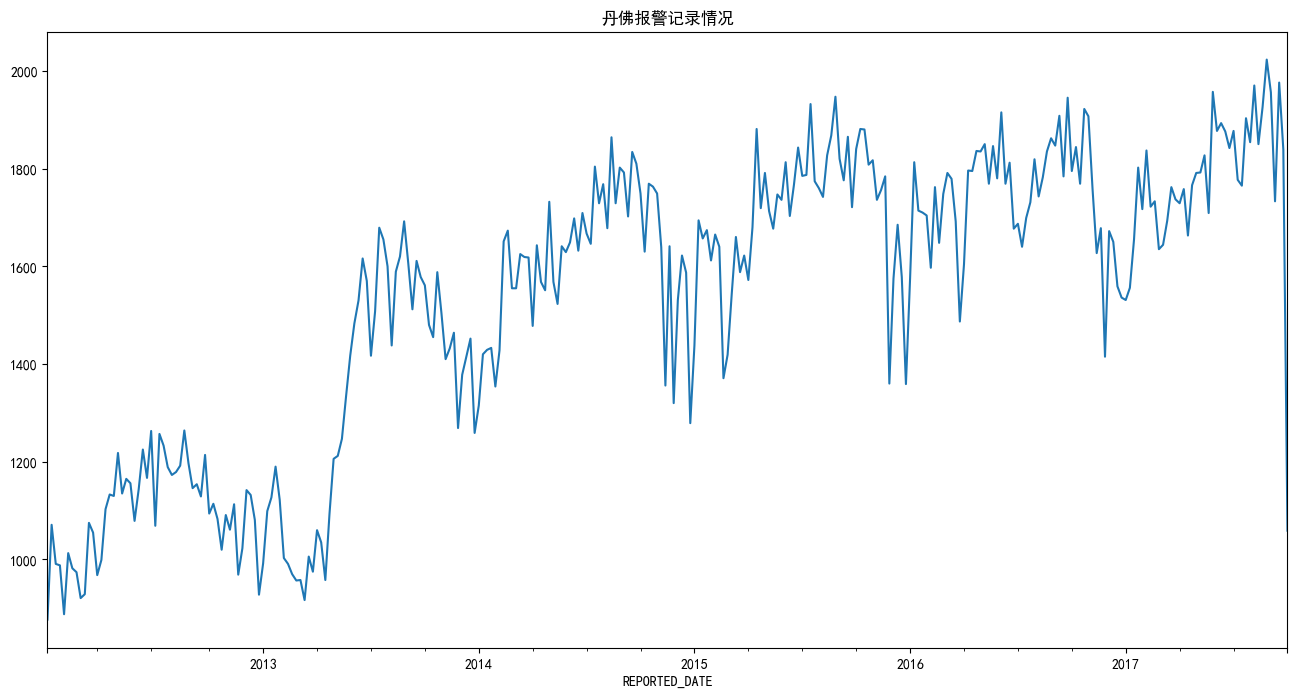

In [67]:
plt.rcParams['font.sans-serif'] = 'SimHei'
weekly_crimes.plot(figsize=(16,8),title='丹佛报警记录情况')

## 示例：分析每季度的犯罪和交通事故数据

In [68]:
# Q表示季度
crime_quarterly = crime_sort.resample('Q')['IS_CRIME','IS_TRAFFIC'].sum()
crime_quarterly

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-03-31,7882,4726
2012-06-30,9641,5255
2012-09-30,10566,5003
2012-12-31,9197,4802
2013-03-31,8730,4442
2013-06-30,12259,4510
2013-09-30,15799,4942
2013-12-31,13910,4968
2014-03-31,14487,5021


In [69]:
# 所有日期都是该季度的最后一天，使用QS生成每季度的第一天
crime_quarterly = crime_sort.resample('QS')['IS_CRIME','IS_TRAFFIC'].sum()
crime_quarterly

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-01-01,7882,4726
2012-04-01,9641,5255
2012-07-01,10566,5003
2012-10-01,9197,4802
2013-01-01,8730,4442
2013-04-01,12259,4510
2013-07-01,15799,4942
2013-10-01,13910,4968
2014-01-01,14487,5021


Text(0.5, 1.0, '丹佛犯罪和交通事故数据')

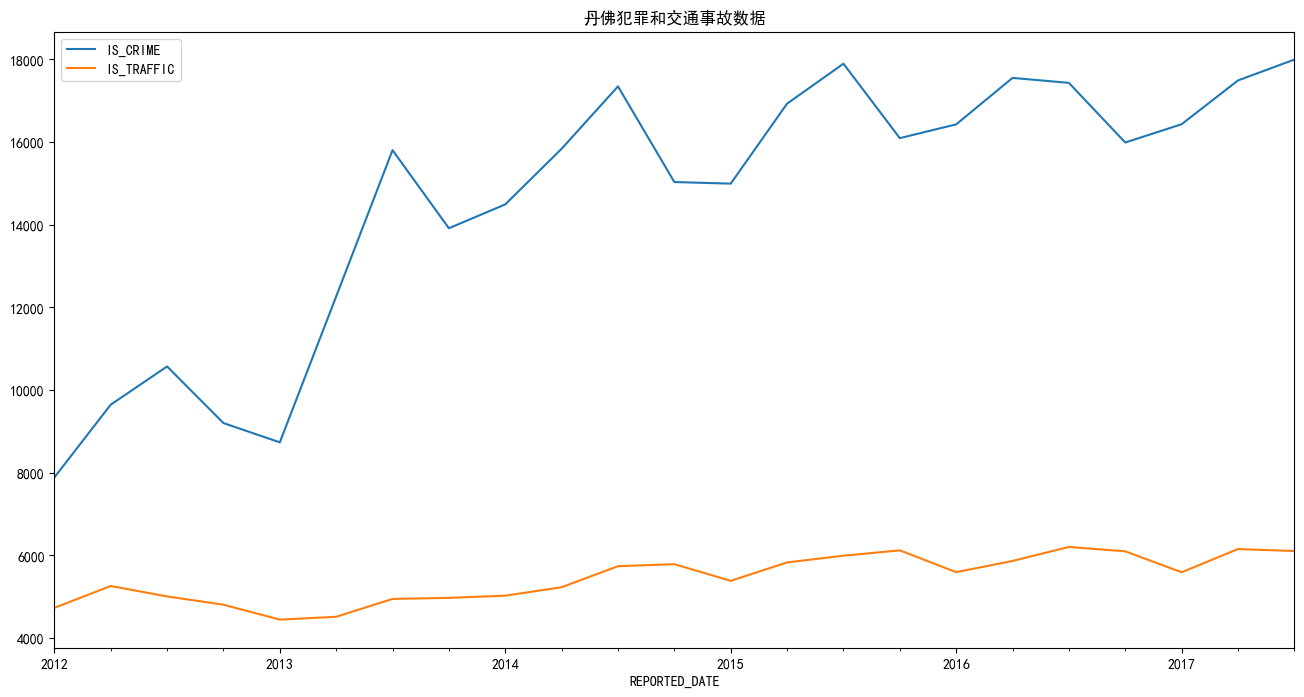

In [70]:
crime_quarterly.plot(figsize=(16,8))
plt.title('丹佛犯罪和交通事故数据')

## 示例：分析每周每一天的报警记录情况：可以通过Timestamp的dt属性得到周几，然后统计

In [71]:
crime = pd.read_csv('./data/crime.csv',parse_dates=['REPORTED_DATE'])
crime.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0
3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0
4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0


In [72]:
wd_counts = crime['REPORTED_DATE'].dt.weekday.value_counts()
wd_counts

0    70024
4    69621
2    69538
3    69287
1    68394
5    58834
6    55213
Name: REPORTED_DATE, dtype: int64

<AxesSubplot: title={'center': '丹佛犯罪和交通事故按周分析'}>

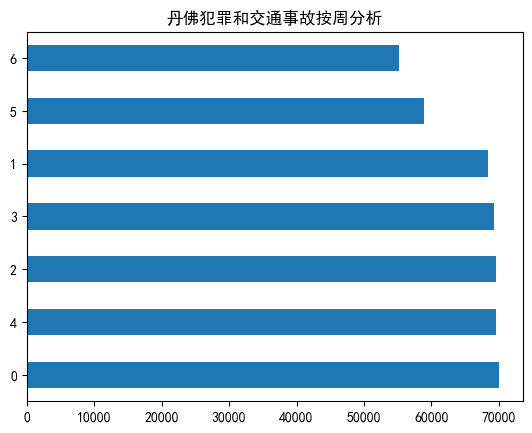

In [73]:
wd_counts.plot(kind='barh',title='丹佛犯罪和交通事故按周分析')

## 示例：在上一步的基础上，进一步分析每周每天的犯罪记录和交通事故记录

In [74]:
left = crime[crime['IS_TRAFFIC']==1]['REPORTED_DATE'].dt.weekday.value_counts()
left

4    20814
3    19845
2    19508
1    18755
0    17895
5    15516
6    12968
Name: REPORTED_DATE, dtype: int64

In [75]:
right = crime[crime['IS_CRIME'] == 1]['REPORTED_DATE'].dt.weekday.value_counts()
right

0    52158
2    50054
1    49658
3    49470
4    48833
5    43363
6    42315
Name: REPORTED_DATE, dtype: int64

In [76]:
result = pd.concat([left,right],axis=1)
result

,REPORTED_DATE,REPORTED_DATE
4,20814,48833
3,19845,49470
2,19508,50054
1,18755,49658
0,17895,52158
5,15516,43363
6,12968,42315


In [77]:
result.columns=['IS_TRAFFIC','IS_CRIME']
result

,IS_TRAFFIC,IS_CRIME
4,20814,48833
3,19845,49470
2,19508,50054
1,18755,49658
0,17895,52158
5,15516,43363
6,12968,42315


<AxesSubplot: >

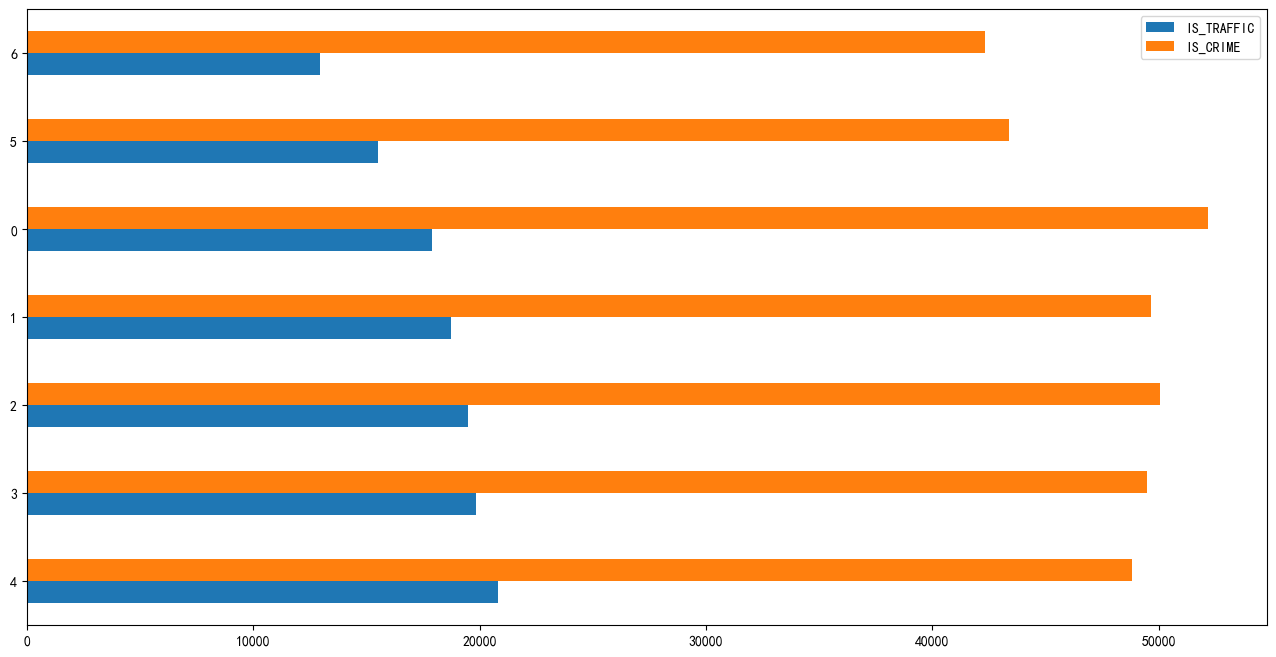

In [78]:
result.plot(kind='barh',figsize=(16,8))

# 总结
- pandas 中，datetime64用来表示时间序列类型
- 时间序列类型的数据可以作为行索引，对应的数据类型是DatetimeIndex类型
- datetime64类型可以做差，返回的是timedelta类型
- 转换成时间序列类型后，可以按照时间的特点对数据进行处理
- 提取日期的各个部分（月，日，星期...)
- 进行日期运算
- 按照日期范围取值